## Описание проекта<a name="0."></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

## Описание данных

* <b>Name</b> — название игры
* <b>Platform</b> — платформа
* <b>Year_of_Release</b> — год выпуска
* <b>Genre</b> — жанр игры
* <b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)
* <b>EU_sales</b> — продажи в Европе (миллионы долларов)
* <b>JP_sales</b> — продажи в Японии (миллионы долларов)
* <b>Other_sales</b> — продажи в других странах (миллионы долларов)
* <b>Critic_Score</b> — оценка критиков (максимум 100)
* <b>User_Score</b> — оценка пользователей (максимум 10)
* <b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Импортируем библиотеки:


In [1]:
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

Откроем файл с данными и изучим общую информацию:

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заменим названия столбцов:

In [4]:
games.columns = games.columns.str.lower()

Проверим датасет на наличие пропусков:

In [5]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропущенные значения присутствуют в столбцах "years_of_release", "critical_score", "user_score", "raiting"

tbd = 'To Be Determined', значит, что игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации, т.е. по сути это NaN

поменяем тип user_score на 'float', т.к. это численное значение, а при выгрузке датасета оно object

In [6]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

In [7]:
games['rating'] = games['rating'].fillna('no rating')

In [8]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating


Посчитаем суммарные продажи во всех регионах:

In [9]:
games['sales_total'] = games.na_sales + games.eu_sales + games.jp_sales

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы:

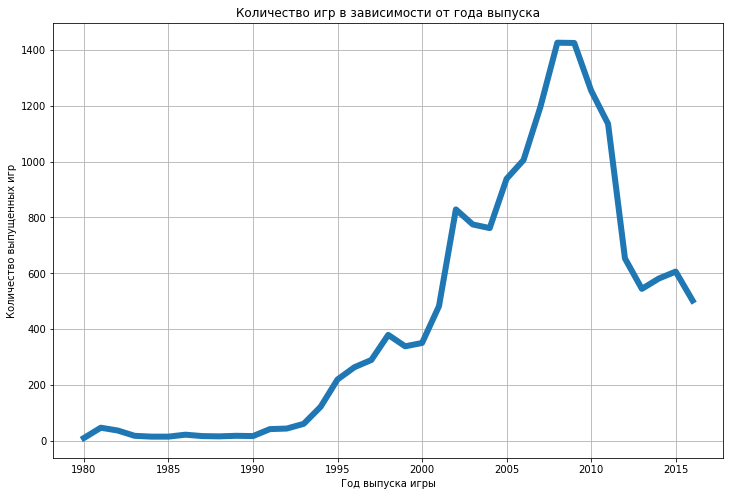

In [10]:
release_per_year = games.groupby('year_of_release').agg({'name': 'count'}).reset_index()
x = release_per_year.year_of_release
y = release_per_year.name
plt.figure(figsize=(12, 8))
plt.plot(x, y, linewidth=6.0)
plt.grid(True)
plt.title('Количество игр в зависимости от года выпуска')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.show()

Судя по графику, индустрия начала активно развиваться где-то с середины 90х годов, но производство начало падать примерно в 2008г. Возможно, это связано с переходом на мобильные устройства и мобильные игры

Посмотрим, как менялись продажи по платформам. Найдем платформы с наибольшими суммарными продажами 

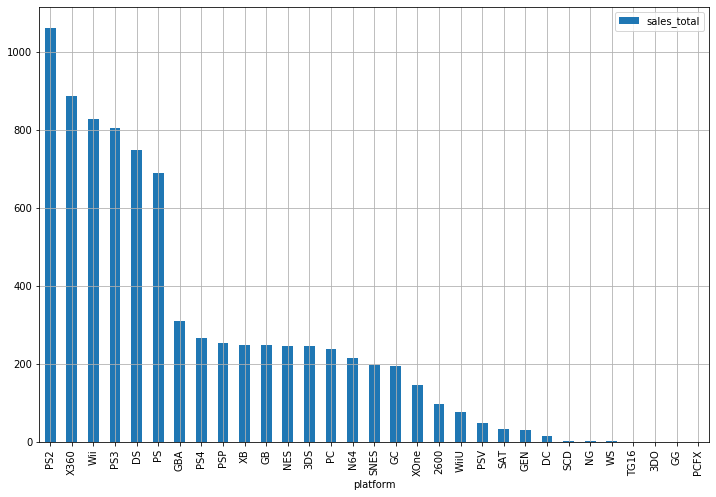

In [11]:
top_sales_platform = (games
                      .pivot_table(index='platform', 
                                   values='sales_total', 
                                   aggfunc='sum')\
                      .sort_values('sales_total', ascending=False)\
                      .reset_index())
top_sales_platform.plot('platform', 'sales_total', kind='bar', figsize=(12, 8), grid=True)

In [12]:
games.groupby('platform')['sales_total'].sum().to_frame('sales_total').sort_values(by='sales_total', ascending=False).head(10)

,sales_total
platform,
PS2,1062.33
X360,885.66
Wii,828.44
PS3,803.97
DS,746.86
PS,689.95
GBA,310.12
PS4,265.79
PSP,252.63


По объемам продаж явно выделяются первые 6 платформ

In [13]:
top6_list = {x[0] for x in top_sales_platform.head(6).itertuples(index=False)}

In [14]:
top6_sales_per_years = (games
                        .query('platform in @top6_list')
                        .pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='sales_total', 
                                     aggfunc='sum')
                        .fillna(0))

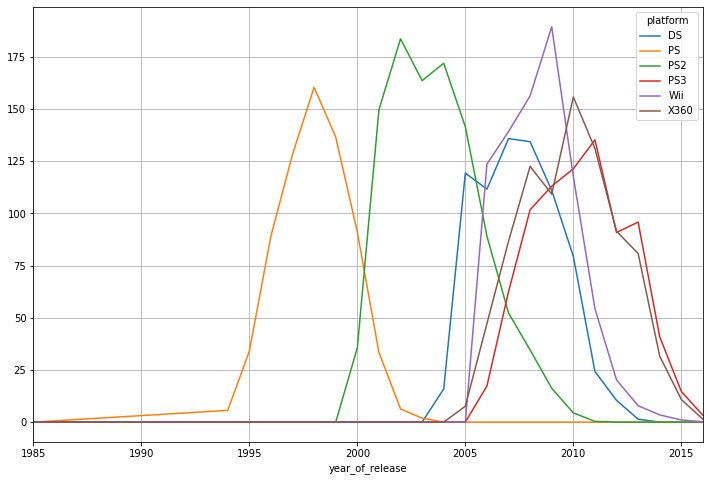

In [15]:
top6_sales_per_years.plot(figsize=(12, 8), grid=True)

Судя по графику, каждая платформа живёт примерно 8-10 лет

Далее нам нужно выбрать период, на основании анализа данных которого мы будем строить предсказательные модели на 2017 год.
Мы знаем, что данные за 2016 год не полные, поэтому пока что не будем использовать его для анализа.

Построим график зависимости глобальных продаж по различным платформам, начиная с 2009 года и найдем те позиции, продажи по которым растут - эти платформы будут потенциально прибыльными

In [16]:
promising_platform_sum = (games
                      .query('2009<year_of_release<2016')
                      .pivot_table(index='year_of_release', 
                                   columns='platform', 
                                   values='sales_total', 
                                   aggfunc='sum')
                      .fillna(0))

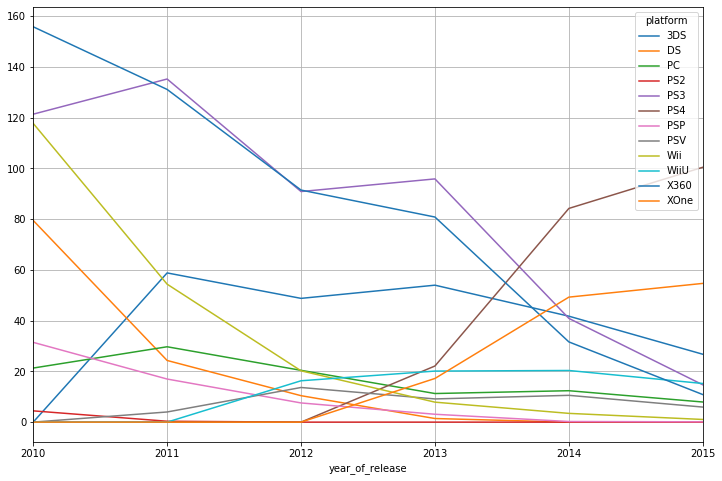

In [17]:
promising_platform_sum.plot(figsize=(12, 8), grid=True)

Если судить по графику, то растут только платформы PlayStation4 и XBoxOne. Все остальные консоли теряют в продажах.

Данные платформы заменили PlayStation3 и XBox360 

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценим разницу в продажах и в средних продажах на разных платформах и опишем результат

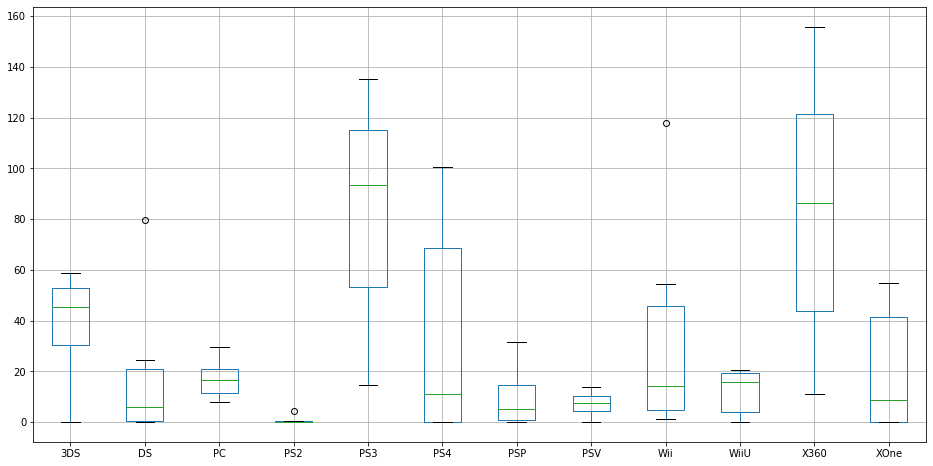

In [18]:
promising_platform_sum.boxplot(figsize=(16, 8))

Оценим распределение средних продаж видеоигр на разных платформах в разные годы:

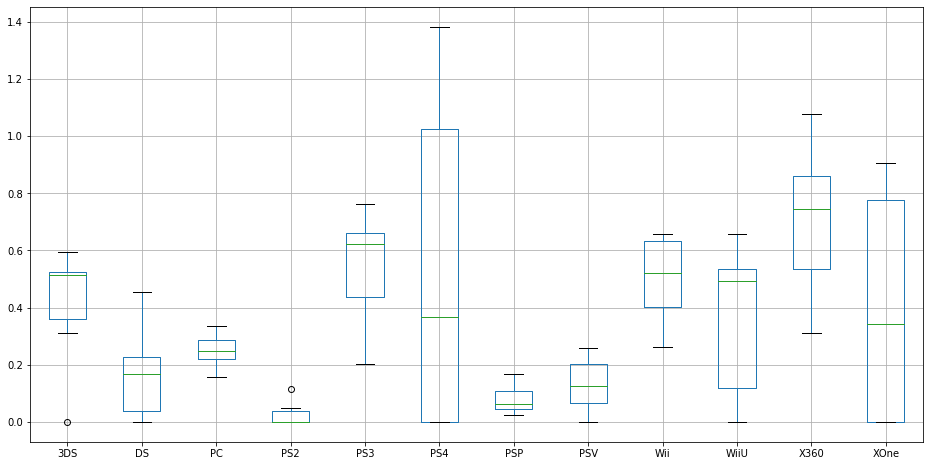

In [19]:
promising_platform_mean = (games
                      .query('2009<year_of_release<2016')
                      .pivot_table(index='year_of_release', 
                                   columns='platform', 
                                   values='sales_total', 
                                   aggfunc='mean')
                      .fillna(0))
promising_platform_mean.boxplot(figsize=(16, 8))

Из данного boxplot мы можем увидеть распределение объемов продаж. Явно выделяются PS3, Wii, X360, у которых самые большие объемы продаж в исследуемом периоде. Глобальной разницы по средним объемам продаж не наблюдается. Положение PS4 и XOne скорее всего можно объяснить тем, что данные приставки появились в продаже позднее остальных

Построим boxplot с распредлением глобальных продаж каждой игры на двух перспективных платформах

In [20]:
sales_two_platforms = (games
                       .query('(platform=="PS4" or platform=="XOne") and (sales_total>0)')
                       .pivot_table(index='name', 
                                    columns='platform', 
                                    values='sales_total')
                       .fillna(0))
sales_two_platforms.head()

platform,PS4,XOne
name,,
7 Days to Die,0.12,0.05
Adventure Time: Finn & Jake Investigations,0.08,0.05
Aegis of Earth: Protonovus Assault,0.02,0.00
Agatha Christie's The ABC Murders,0.02,0.01
Akiba's Trip: Undead & Undressed,0.09,0.00


Уберем из анализа данные, продажи по которым составляют 0, чтобы не учитывать игры, вышедшие только на одной из платформ

(0, 4)

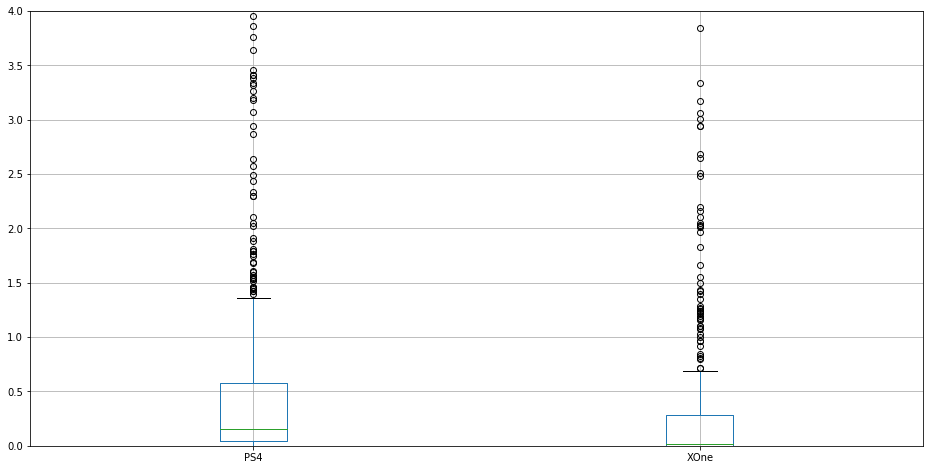

In [21]:
sales_two_platforms.query('PS4>0 or XOne>0').boxplot(figsize=(16, 8))
plt.ylim(0, 4)

По данным ящикам мы видим что продажи на PS4 почти в два раза выше, чем на XOne. Все выбросы - это игры, которые показывают большие продажи, по сравнению с общей массой выпускаемых игр (Хиты)

In [22]:
print('Средние продажи на PS4: {:.2f}'.format(sales_two_platforms.PS4.mean()))
print('Средние продажи на XOne: {:.2f}'.format(sales_two_platforms.XOne.mean()))

Средние продажи на PS4: 0.63
Средние продажи на XOne: 0.34


Средние продажи на разных платформах так же отличаются почти вдвое. По проведенному анализу мы можем сделать вывод, что PlayStation4 более привлекательная платформа для выпуска игр, чем XOne.

Рассмотрим влияние отзывов пользователей и критиков на продажи:


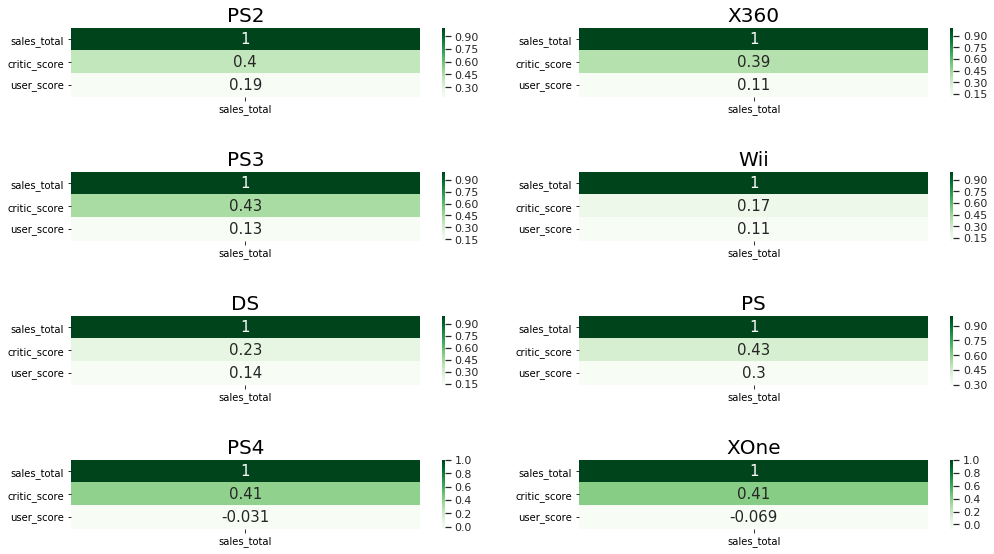

In [23]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['sales_total' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Из всех платформ выделяются Wii и DS, по которым зависимость не очень большая.
Есть платформы, где оценка критиков влияет на конечную выручку продукта значительно больше, чем оценка пользователей(DS, PS4 и Xone).

In [24]:
#Построим графики зависимости выручки от отзывов
def dependence_of_revenue(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='sales_total', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sales_total', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()

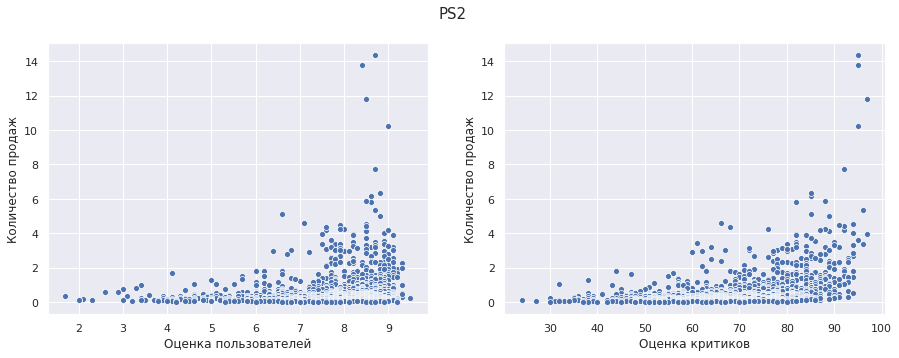

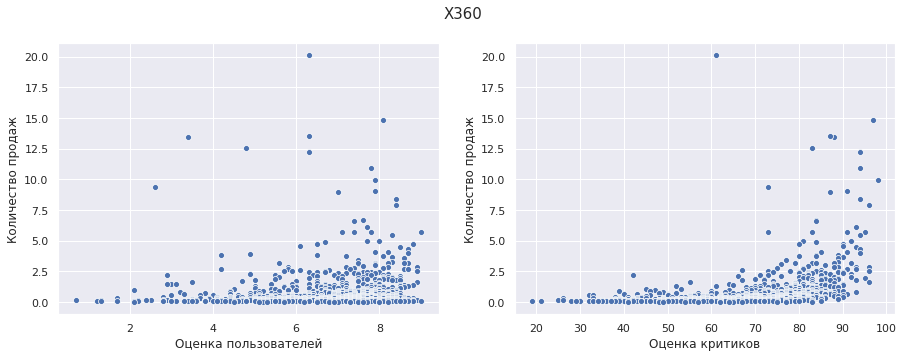

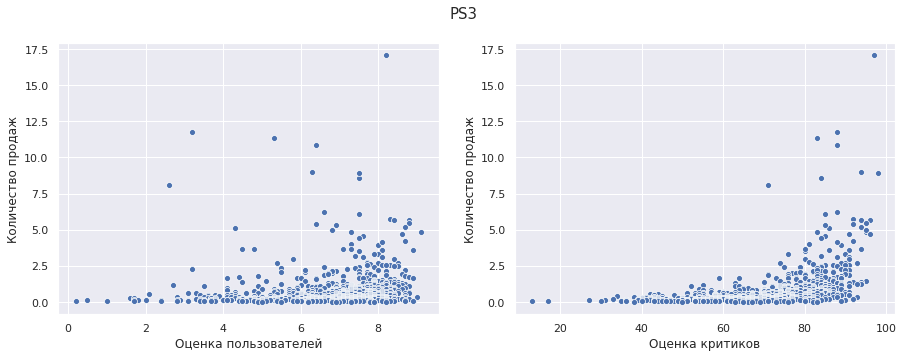

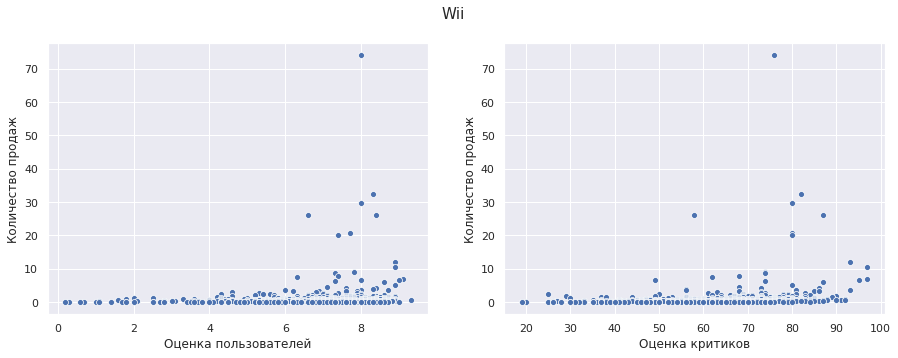

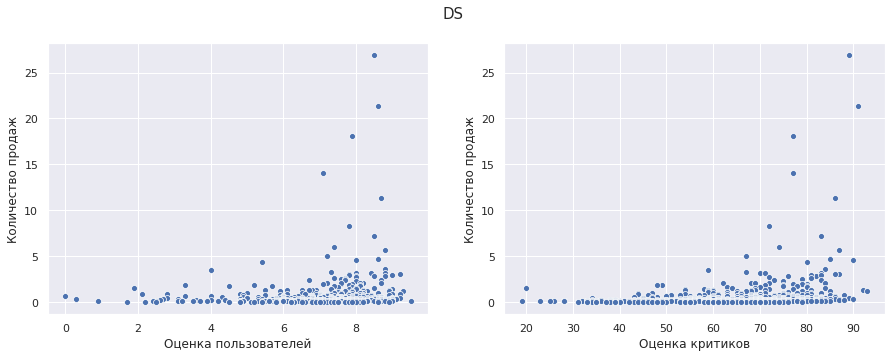

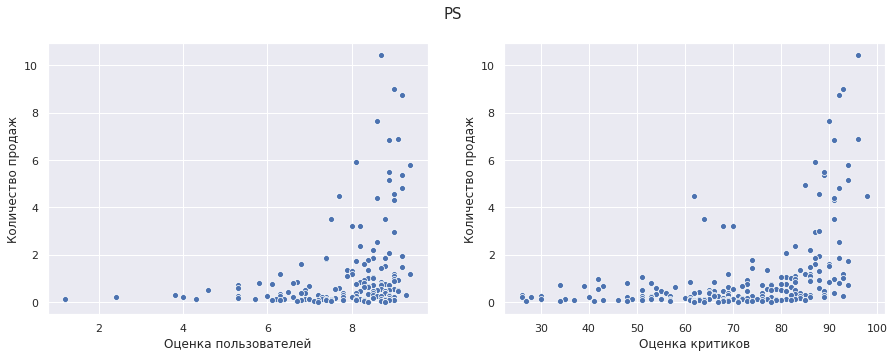

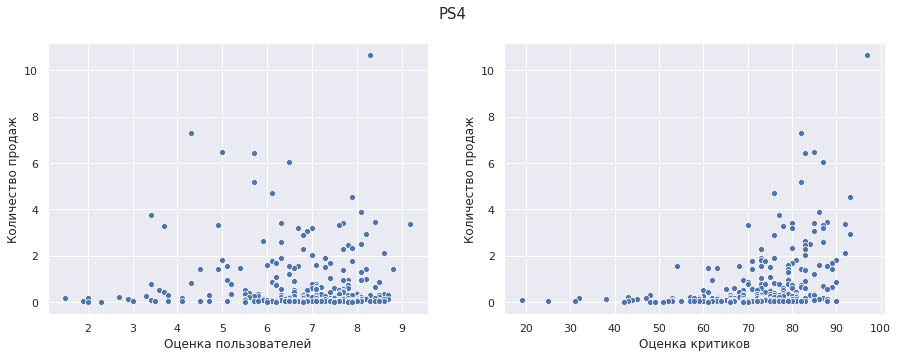

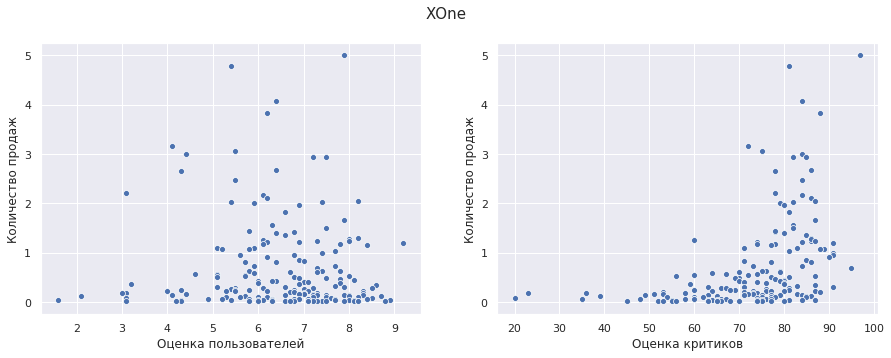

In [25]:
for platform in top_platforms:
    dependence_of_revenue(platform)

Cвязь между оценками пользователей и продажами очень слабая у всех платформ, либо её вообще нет. Только у WiiU корреляция между отзывами пользователей и количеством продажами довольно большая. Можно сделать вывод, что покупатели воспринимают авторитетнее мнение критиков, нежели чем других пользователей. 

Посмотрим на общее распределение игр по жанрам на всех популярных платформах за последние 10 лет:

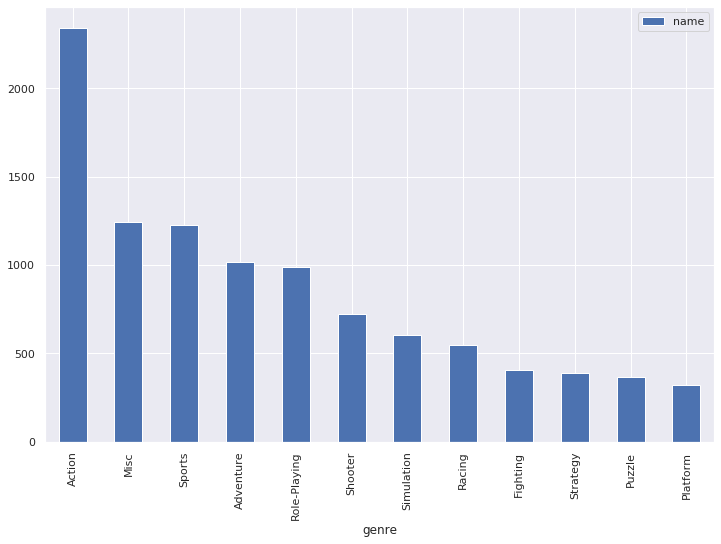

In [26]:
platform_10year_dict = ({x[0] for x in promising_platform_sum
                         .T
                         .reset_index()
                         .itertuples(index=False)})
(games
 .query('platform in @platform_10year_dict and year_of_release>2005')
 .groupby('genre')
 .count()
 .reset_index()
 .sort_values(by='name', 
              ascending=False)
 .plot(x='genre', 
       y='name', 
       kind='bar', 
       figsize=(12, 8)))

По данному распределению видно, что на популярных платформах самым ходовым жанром является Action, который по количеству выпущенных игр превышает почти в 2 раза следующий за ним жанр.

Посмотрим на данный срез с точки зрения глобальных продаж по жанрам:

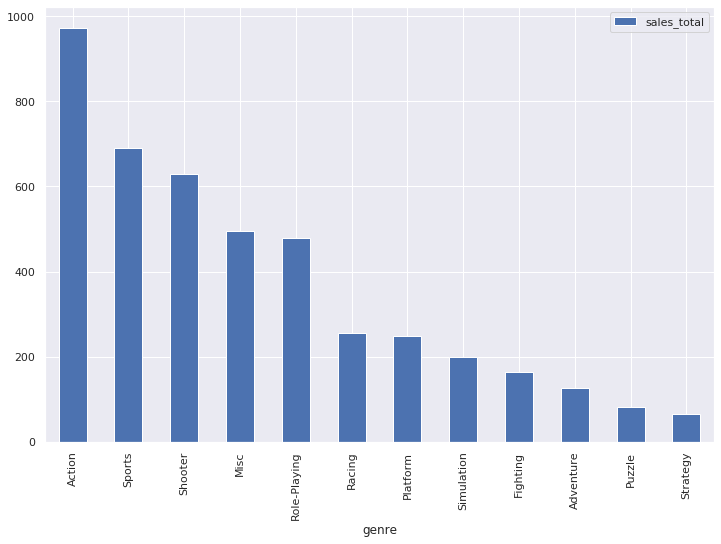

In [27]:
(games
 .query('platform in @platform_10year_dict and year_of_release>2005')
 .pivot_table(index='genre', 
              values='sales_total', 
              aggfunc='sum')
 .sort_values('sales_total', 
              ascending=False)
 .reset_index().plot(x='genre', 
       y='sales_total', 
       kind='bar', 
       figsize=(12, 8)))

Сумма глобальных продаж, по всей видимости, не очень коррелирует с количеством выпущенных игр. На первом месте так и остается жанр Action, но дальнейшие места распределены по другому - велико количество покупок в жанре Sports и Shooters. А вот Adventure, не смотря на большое количество выпущенных игр, продаются с печальным успехом.

## Портрет пользователя регионов NA, EU, JP

In [28]:
top5_platform = (games
                 .query('(platform in @platform_10year_dict) and year_of_release>2006')
                 .pivot_table(index='platform', 
                              values=['na_sales', 
                                      'eu_sales', 
                                      'jp_sales', 
                                      'sales_total'], 
                              aggfunc='sum'))

#ТОП5 на рынке Северной Америки
top5_platform_NA = top5_platform.sort_values('na_sales', ascending=False).head(5)
top5_platform_NA = top5_platform_NA[['na_sales']]

#ТОП5 на рынке Европы
top5_platform_EU = top5_platform.sort_values('eu_sales', ascending=False).head(5)
top5_platform_EU = top5_platform_EU[['eu_sales']]

#ТОП5 на рынке Японии
top5_platform_JP = top5_platform.sort_values('jp_sales', ascending=False).head(5)
top5_platform_JP = top5_platform_JP[['jp_sales']]

In [29]:
top5_genres = (games
                 .query('(platform in @platform_10year_dict) and year_of_release>2006')
                 .pivot_table(index='genre', 
                              values=['na_sales', 
                                      'eu_sales', 
                                      'jp_sales', 
                                      'sales_total'], 
                              aggfunc='sum'))

#ТОП5 на рынке Северной Америки
top5_genres_NA = top5_genres.sort_values('na_sales', ascending=False).head(5)
top5_genres_NA = top5_genres_NA[['na_sales']]

#ТОП5 на рынке Европы
top5_genres_EU = top5_genres.sort_values('eu_sales', ascending=False).head(5)
top5_genres_EU = top5_genres_EU[['eu_sales']]

#ТОП5 на рынке Японии
top5_genres_JP = top5_genres.sort_values('jp_sales', ascending=False).head(5)
top5_genres_JP = top5_genres_JP[['jp_sales']]

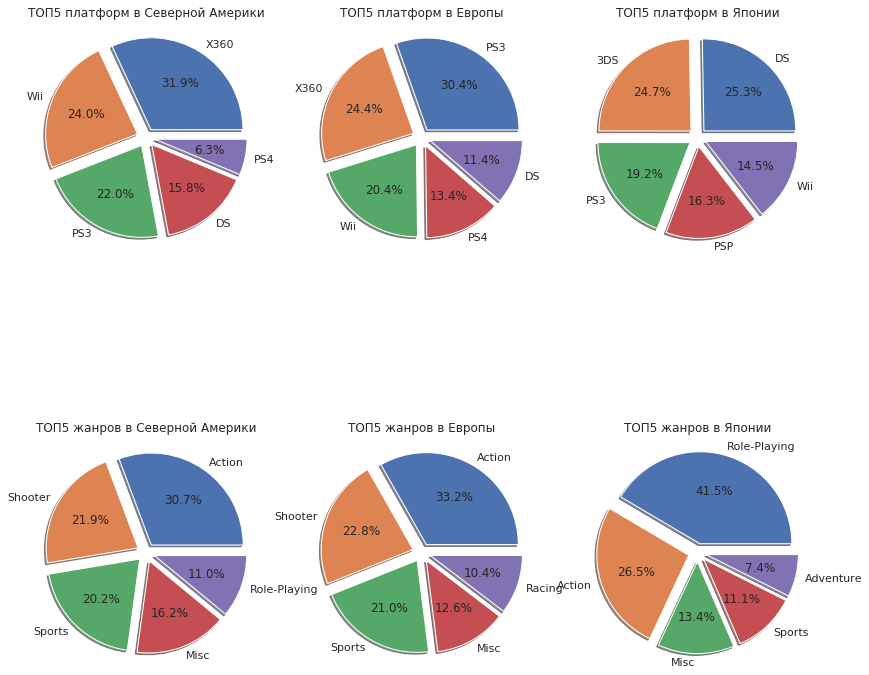

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(14, 14))
#---------------------------------------------------------#
axs[0, 0].set_title('ТОП5 платформ в Северной Америки')
axs[0, 0].pie(top5_platform_NA.na_sales, 
              labels=top5_platform_NA.index, 
              autopct='%1.1f%%', 
              shadow=True, 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[0, 1].set_title('ТОП5 платформ в Европы')
axs[0, 1].pie(top5_platform_EU.eu_sales, 
              labels=top5_platform_EU.index, 
              autopct='%1.1f%%', 
              shadow=True, 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[0, 2].set_title('ТОП5 платформ в Японии')
axs[0, 2].pie(top5_platform_JP.jp_sales, 
              labels=top5_platform_JP.index, 
              autopct='%1.1f%%', 
              shadow=True, 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))
#---------------------------------------------------------#
axs[1, 0].set_title('ТОП5 жанров в Северной Америки')
axs[1, 0].pie(top5_genres_NA.na_sales, 
              labels=top5_genres_NA.index, 
              autopct='%1.1f%%', 
              shadow=True, 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[1, 1].set_title('ТОП5 жанров в Европы')
axs[1, 1].pie(top5_genres_EU.eu_sales, 
              labels=top5_genres_EU.index, 
              autopct='%1.1f%%', 
              shadow=True, 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))

axs[1, 2].set_title('ТОП5 жанров в Японии')
axs[1, 2].pie(top5_genres_JP.jp_sales, 
              labels=top5_genres_JP.index, 
              autopct='%1.1f%%', 
              shadow=True, 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1))


plt.show()

В Японии предпочтения довольно отличны от других регионов, это может быть из-за их менталитета и образа жизни. Они проводят большую часть своего времени на работе, и могу предположить, что именно поэтому выбор жителей Японии в платформах смещен в сторону мобильных консолей, ведь их намного удобнее использовать при такой загруженности

Доли продаж в зависимости от рейтинга

In [31]:
rating_regions = (games
                 .query('(platform in @platform_10year_dict) and year_of_release>2006 and rating!=0')
                 .pivot_table(index='rating', 
                              values=['na_sales', 
                                      'eu_sales', 
                                      'jp_sales', 
                                      'sales_total'], 
                              aggfunc='sum'))

#Распределение продаж от рейтингов на рынке Северной Америки
rating_regions_NA = rating_regions.sort_values('na_sales', ascending=False).head(5)
rating_regions_NA = rating_regions_NA[['na_sales']]

#Распределение продаж от рейтингов на рынке Европы
rating_regions_EU = rating_regions.sort_values('eu_sales', ascending=False).head(5)
rating_regions_EU = rating_regions_EU[['eu_sales']]

#Распределение продаж от рейтингов на рынке Японии
rating_regions_JP = rating_regions.sort_values('jp_sales', ascending=False).head(5)
rating_regions_JP = rating_regions_JP[['jp_sales']]

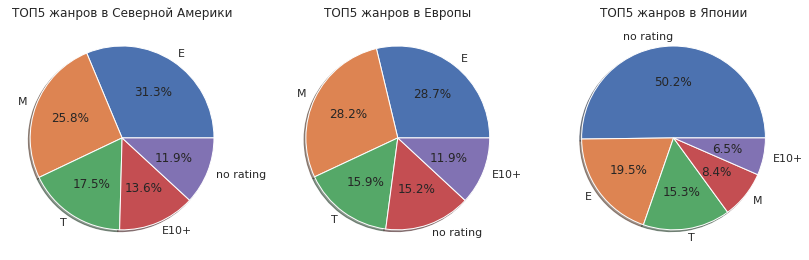

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(14, 14))

axs[0].set_title('ТОП5 жанров в Северной Америки')
axs[0].pie(rating_regions_NA.na_sales, 
              labels=rating_regions_NA.index, 
              autopct='%1.1f%%', 
              shadow=True)

axs[1].set_title('ТОП5 жанров в Европы')
axs[1].pie(rating_regions_EU.eu_sales, 
              labels=rating_regions_EU.index, 
              autopct='%1.1f%%', 
              shadow=True)

axs[2].set_title('ТОП5 жанров в Японии')
axs[2].pie(rating_regions_JP.jp_sales, 
              labels=rating_regions_JP.index, 
              autopct='%1.1f%%', 
              shadow=True)

plt.show()

Рынки Северной Америки и Европы по игровым платформам довольно схожи между собой. Топ продаж, в основном, занимают стационарные консоли. В Японии же приоритет отдают мобильным консолям, они занимают почти 2/3 рынка.
Жанровые предпочтения жителей Европы и Северной Америки практически идентичны. В Японии большую популярность имеют ролевые игры, а так же значительную долю занимает жанр Action.
Больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

## Исследование статистических показателей

Посмотрим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах.

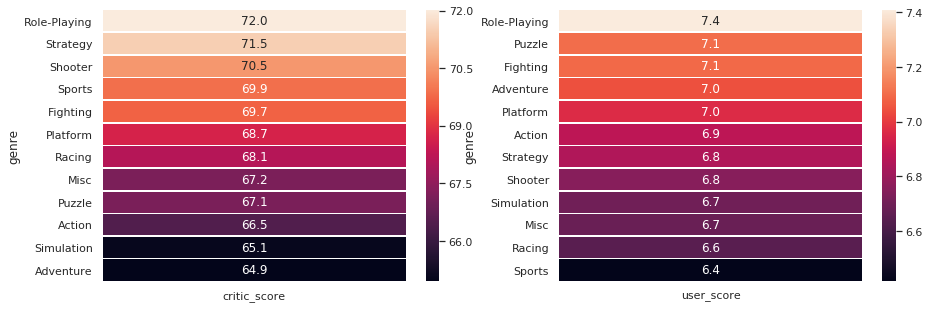

<Figure size 720x360 with 0 Axes>

In [33]:
critic_genre = games[games['year_of_release'] > 2005].pivot_table(
    index='genre', values='critic_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='critic_score', ascending=False)
user_genre = games[games['year_of_release'] > 2005].pivot_table(
    index='genre', values='user_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='user_score', ascending=False)
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
plt.figure(figsize=(10,5))
sns.heatmap(critic_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[0])
sns.heatmap(user_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[1])

На основе средних оценок по жанрам за период с 2005 года можно сделать выводы:

Наивысшие оценки критиков получают: shooter, strategy, role-playing.

Наивысшие оценки пользователей получают: role-playing, puzzle, fighting.

Это говорит о том, что мнения критиков и пользователей по поводу жанров игр не всегда могут совпадать

Посчитаем среднее количество, дисперсию и стандартное отклонение

In [34]:
game_genres = games['genre'].unique()
game_genres = game_genres[:-1]
game_genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам пользователей

In [35]:
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['user_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['user_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['user_score'].median())
    print('\n')

Дисперсия SPORTS : 2.5941606711770175
Стандартное отклонение SPORTS : 1.6106398328543279
Среднее SPORTS : 6.96119673617407
Медиана SPORTS : 7.4


Дисперсия PLATFORM : 2.2856989693423007
Стандартное отклонение PLATFORM : 1.5118528266145157
Среднее PLATFORM : 7.3014018691588785
Медиана PLATFORM : 7.7


Дисперсия RACING : 2.38795680501167
Стандартное отклонение RACING : 1.5453015255967588
Среднее RACING : 7.036193447737911
Медиана RACING : 7.4


Дисперсия ROLE-PLAYING : 1.1836433722368849
Стандартное отклонение ROLE-PLAYING : 1.0879537546407407
Среднее ROLE-PLAYING : 7.619515477792732
Медиана ROLE-PLAYING : 7.8


Дисперсия PUZZLE : 2.2915625
Стандартное отклонение PUZZLE : 1.5137907715401095
Среднее PUZZLE : 7.175
Медиана PUZZLE : 7.5


Дисперсия MISC : 2.3883950373856506
Стандартное отклонение MISC : 1.5454433141935846
Среднее MISC : 6.819362186788155
Медиана MISC : 7.1


Дисперсия SHOOTER : 2.3020877958621466
Стандартное отклонение SHOOTER : 1.5172632585883528
Среднее SHOOTER : 7.041883

Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам критиков

In [36]:
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['critic_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['critic_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['critic_score'].median())
    print('\n')

Дисперсия SPORTS : 192.44957338338818
Стандартное отклонение SPORTS : 13.872619557365082
Среднее SPORTS : 71.96817420435511
Медиана SPORTS : 75.0


Дисперсия PLATFORM : 174.2521284649547
Стандартное отклонение PLATFORM : 13.200459403556934
Среднее PLATFORM : 68.05835010060362
Медиана PLATFORM : 69.0


Дисперсия RACING : 202.738568086544
Стандартное отклонение RACING : 14.238629431463691
Среднее RACING : 67.96361185983828
Медиана RACING : 69.0


Дисперсия ROLE-PLAYING : 143.80064768055612
Стандартное отклонение ROLE-PLAYING : 11.991690776556746
Среднее ROLE-PLAYING : 72.65264586160109
Медиана ROLE-PLAYING : 74.0


Дисперсия PUZZLE : 161.46745455994895
Стандартное отклонение PUZZLE : 12.706984479409304
Среднее PUZZLE : 67.42410714285714
Медиана PUZZLE : 70.0


Дисперсия MISC : 199.9144953551543
Стандартное отклонение MISC : 14.139112254846635
Среднее MISC : 66.61950286806884
Медиана MISC : 69.0


Дисперсия SHOOTER : 211.55299191144783
Стандартное отклонение SHOOTER : 14.544861357587697
С

Построим распределения оценок пользователей и критиков по жанрам игр.

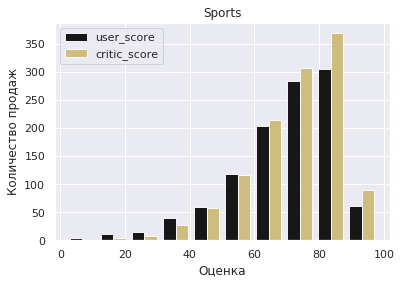

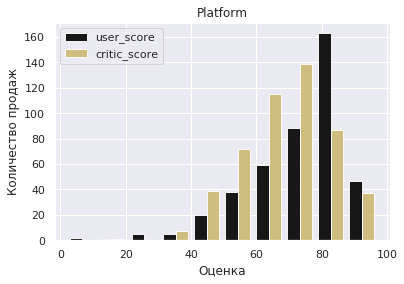

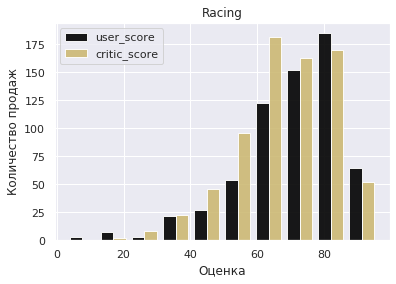

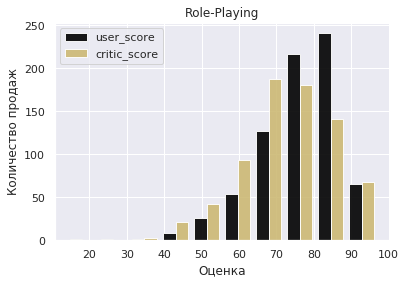

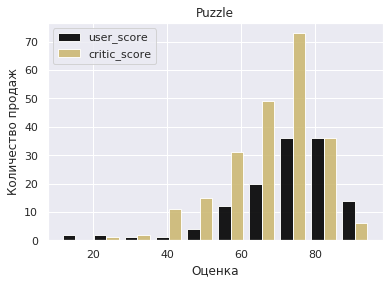

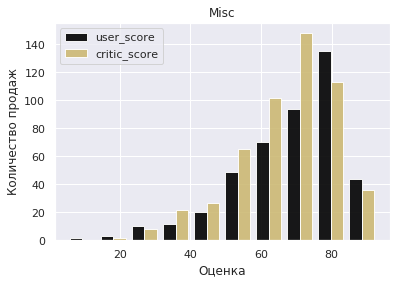

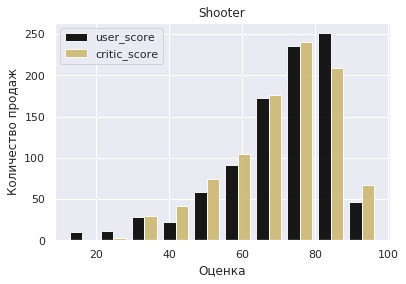

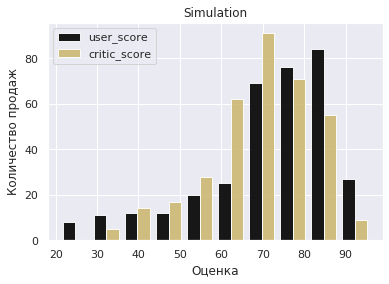

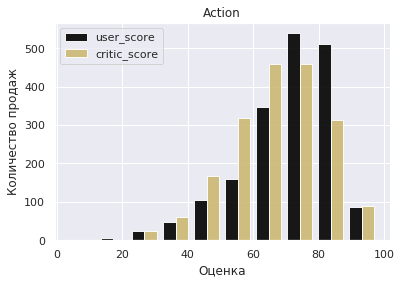

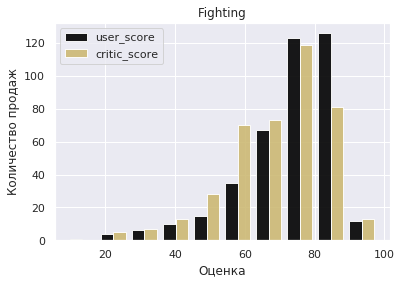

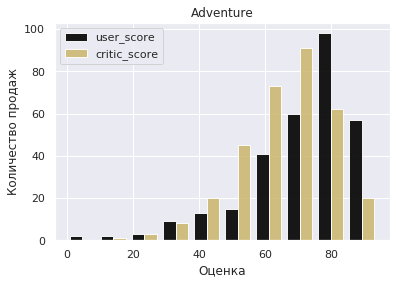

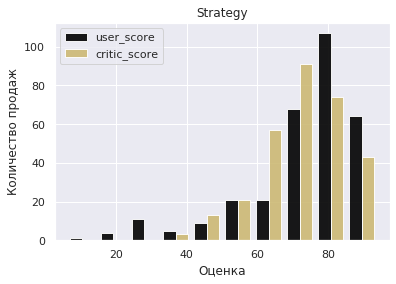

In [37]:
def genre_hist(genre):
    fig, axes = plt.subplots()
    data = games[games['genre'] == genre]
    user_score = data['user_score'] * 10
    critic_score = data['critic_score']
    colors = ['black', 'y']

    plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
    axes.set(xlabel='Оценка')
    axes.set(ylabel='Количество продаж')
    plt.legend()
    plt.title(genre)

for genre in game_genres:
    genre_hist(genre)    

Построим общие распределения оценок пользователей и критиков

Text(0.5, 1.0, 'Cоотношение оценок пользователей и критиков')

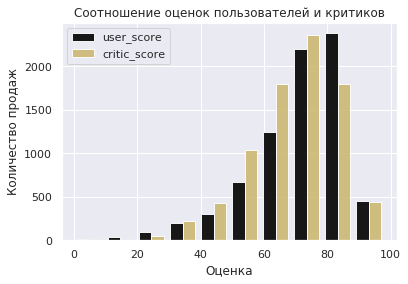

In [38]:
# Домножим оценки пользователей на 10, чтобы мы смогли сравнить распределения.
fig, axes = plt.subplots()
user_score = games['user_score'] * 10
critic_score = games['critic_score']
colors = ['black', 'y']

plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
axes.set(xlabel='Оценка')
axes.set(ylabel='Количество продаж')
plt.legend()
plt.title('Cоотношение оценок пользователей и критиков')

Распределения оценок пользователей и критиков симметричны и смещены влево. Можно сделать вывод, что в нашем датасете игр с оценками критиков > 80 и оценками пользователей > 8 довольно немного.

## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформируем нулевую гипотезу:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей, нам необходимо взять две выборки и сравнить их между собой с помощью t-критерия Стьюдента. Определим критический уровень значимости на уровне 5%

Для начала убедимся, что распределения близки к нормальным:

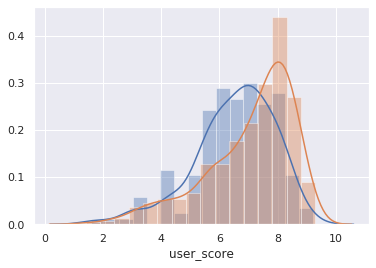

In [39]:
sns.distplot(games.query('platform=="XOne" and user_score>0').user_score, bins=16)
sns.distplot(games.query('platform=="PC" and user_score>0').user_score, bins=16)

Распределения похожи на нормальные, можем применить для сравнения t-критерий Стьюдента

Для проверки нулевой гипотезы используем метод ttest_ind

In [40]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(games.query('platform=="XOne" and user_score>0').user_score, 
                      games.query('platform=="PC" and user_score>0').user_score, 
                      equal_var = False)

print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


Результат проверки:
При сравнении средних пользовательских рейтингов на платформах PS4 и XOne, с использованием t-критерия Стюдента и критическим уровнем значимости 5%, можно предположить, что средние пользовательские рейтинги различается

Средние пользовательские рейтинги жанров Action и Sports разные.

Сформируем нулевую гипотезу:

H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые

H1 - Средние пользовательские рейтинги жанров Action и Sports различаются

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей, нам необходимо взять две выборки и сравнить их между собой с помощью t-критерия Стьюдента. Определим критический уровень значимости на уровне 5%

Так же чтобы применить критерий Стьюдента, сначала убедимся что распределения похожи на нормальные

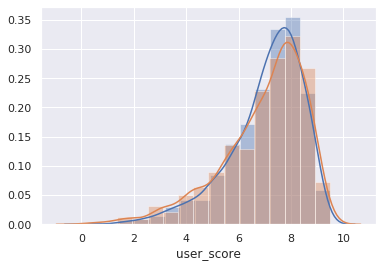

In [41]:
sns.distplot(games.query('genre=="Action" and user_score>0').user_score, bins=16)
sns.distplot(games.query('genre=="Sports" and user_score>0').user_score, bins=16)

Распределения похожи на нормальные, можем применить для сравнения t-критерий Стьюдента

Для проверки нулевой гипотезы используем метод ttest_ind

In [42]:
alpha = 0.05
result = st.ttest_ind(games.query('genre=="Action" and user_score>0').user_score, 
                      games.query('genre=="Sports" and user_score>0').user_score, 
                      equal_var = False)

print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


При сравнении средних пользовательских рейтингов жанров Action и Sports с использованием t-критерия Стюдента и заданным критическим уровнем значимости, можно предположить, что средние пользовательские рейтинги не различаются

## Вывод

Индустрия компьютерных игр начала активно развиваться примерно с середины 90х;

Средний срок жизни игровой платформы псоставляет около 8-10 лет;

На данный момент на рынке существуют две платформы с наиболее стабильным ростом продаж видеоигр: PlayStation4 и Xbox One, остальные платформы имеют тенденции к снижению уровня продаж;

Также были составлены портреты пользователей каждого региона:

Самые популярные игровые платформы в Северной Америке это: X360, PS4, WII, PS3, DS. Топ 5 жанров в северной америке : action, sports, shooter, platform, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе это: PS4, PS3, X360, WII, DS. Топ 5 жанров в Европе : action, sports, shooter, racing, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

Самые популярные игровые платформы в Японии это: DS, PSP, PS3, Wii, 3DS. Топ 5 жанров в Японии : Role-Playing, action, sports, adventure, misc. По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".Жанровые и платформенные предпочтения жителей Северной Америки и Европы схожи;
Выбор жителей Японии в платформах смещен в сторону мобильных консолей, а жанровые предпочтения склоняются к ролевым играм.

Рейтинг E — «Для всех» находится в лидерах по продажам во всех регионах.
Выяснили, что отзывы критиков влияют на продажи.

При проверке гипотез получили следующие выводы: 

Средние пользовательские рейтинги платформ Xbox One и PC различаются.
Средние пользовательские рейтинги жанров Action и Sports не различаются.